In [100]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [101]:
from cifar_utils import get_datasets, plot, show_preds, get_CNN
from utils import train,plot_loss_acc
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score as acc
from tqdm.notebook import tqdm as bar
import matplotlib.pyplot as plt

In [3]:
FOLDER = ".//data//cifar//"
training_set, validation_set, mini_set = get_datasets(FOLDER)
print(len(training_set), len(validation_set))

50000 10000


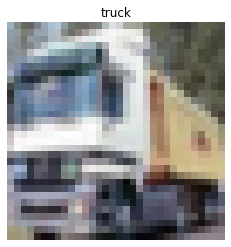

In [4]:
plot(training_set.get_image(1), training_set.get_label(1))

In [12]:
training_gen = DataLoader(training_set, batch_size=32, shuffle=True, num_workers=4)
valid_gen = DataLoader(validation_set, batch_size=len(validation_set))
mini_gen = DataLoader(mini_set, batch_size=32, shuffle=True, num_workers=4)

In [105]:
net = get_CNN([32, 64, 128]) #nn.Sequential(nn.Conv2d(3, 16, 5), nn.ReLU(), nn.MaxPool2d(2), nn.BatchNorm2d(16), nn.Conv2d(16, 32, 3), nn.ReLU(), nn.MaxPool2d(2), nn.BatchNorm2d(32), nn.Conv2d(32, 64, 3), nn.ReLU(), nn.MaxPool2d(2), nn.Flatten(), nn.Linear(256, 10))
crit = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)
net

Sequential(
  (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten()
  (10): Linear(in_features=512, out_features=10, bias=True)
)

In [106]:
train_loss, train_acc, test_loss, test_acc = train(net, crit, opt, training_gen, valid_gen, 20)


Epoch:1, T Loss:1.415, T acc:0.489 V Loss:1.137, V acc:0.597



Epoch:2, T Loss:1.038, T acc:0.636 V Loss:1.031, V acc:0.641



Epoch:3, T Loss:0.890, T acc:0.691 V Loss:0.873, V acc:0.701



Epoch:4, T Loss:0.801, T acc:0.724 V Loss:0.855, V acc:0.705



Epoch:5, T Loss:0.736, T acc:0.747 V Loss:0.824, V acc:0.720



Epoch:6, T Loss:0.685, T acc:0.765 V Loss:0.833, V acc:0.717



Epoch:7, T Loss:0.643, T acc:0.777 V Loss:0.899, V acc:0.699



Epoch:8, T Loss:0.613, T acc:0.788 V Loss:0.792, V acc:0.735



Epoch:9, T Loss:0.580, T acc:0.799 V Loss:0.791, V acc:0.733



Epoch:10, T Loss:0.558, T acc:0.806 V Loss:0.778, V acc:0.745



Epoch:11, T Loss:0.538, T acc:0.814 V Loss:0.817, V acc:0.733



Epoch:12, T Loss:0.514, T acc:0.820 V Loss:0.839, V acc:0.727



Epoch:13, T Loss:0.493, T acc:0.828 V Loss:0.805, V acc:0.732



Epoch:14, T Loss:0.478, T acc:0.832 V Loss:0.787, V acc:0.744



Epoch:15, T Loss:0.462, T acc:0.838 V Loss:0.827, V acc:0.737



Epoch:16, T Loss:0.450, T acc:0.844 V Loss:0.823, V acc:0.739



Epoch:17, T Loss:0.434, T acc:0.847 V Loss:0.806, V acc:0.745



Epoch:18, T Loss:0.427, T acc:0.850 V Loss:0.861, V acc:0.726



Epoch:19, T Loss:0.414, T acc:0.855 V Loss:0.857, V acc:0.732



Epoch:20, T Loss:0.406, T acc:0.857 V Loss:0.830, V acc:0.739


In [20]:
show_preds(net, valid_gen)

pred cat(cat)
pred ship(ship)
pred truck(ship)
pred airplane(airplane)
pred frog(frog)
pred frog(frog)
pred cat(automobile)
pred frog(frog)
pred cat(cat)
pred automobile(automobile)
pred airplane(airplane)
pred truck(truck)
pred deer(dog)
pred horse(horse)
pred truck(truck)
pred ship(ship)
pred dog(dog)
pred cat(horse)
pred ship(ship)
pred frog(frog)
pred horse(horse)
pred airplane(airplane)
pred deer(deer)
pred truck(truck)
pred deer(dog)
pred truck(bird)
pred deer(deer)
pred airplane(airplane)
pred truck(truck)
pred frog(frog)
pred frog(frog)
pred bird(dog)
pred deer(deer)
pred frog(dog)
pred truck(truck)
pred cat(bird)
pred deer(deer)
pred automobile(automobile)
pred truck(truck)
pred dog(dog)
pred airplane(deer)
pred frog(frog)
pred horse(dog)
pred frog(frog)
pred airplane(airplane)
pred truck(truck)
pred cat(cat)
pred truck(truck)
pred horse(horse)
pred bird(frog)
pred truck(truck)
pred ship(ship)
pred frog(airplane)
pred cat(cat)
pred ship(ship)
pred ship(ship)
pred horse(horse)


pred ship(ship)
pred frog(frog)
pred automobile(automobile)
pred deer(deer)
pred bird(bird)
pred airplane(frog)
pred bird(bird)
pred horse(horse)
pred horse(bird)
pred bird(bird)
pred airplane(airplane)
pred ship(ship)
pred frog(frog)
pred airplane(truck)
pred automobile(automobile)
pred horse(horse)
pred automobile(automobile)
pred ship(ship)
pred ship(ship)
pred airplane(airplane)
pred horse(horse)
pred horse(cat)
pred ship(ship)
pred ship(airplane)
pred cat(cat)
pred deer(deer)
pred cat(cat)
pred horse(horse)
pred horse(horse)
pred truck(truck)
pred bird(bird)
pred cat(cat)
pred automobile(automobile)
pred truck(truck)
pred automobile(automobile)
pred truck(truck)
pred bird(frog)
pred cat(cat)
pred cat(cat)
pred frog(cat)
pred automobile(automobile)
pred airplane(airplane)
pred frog(frog)
pred automobile(automobile)
pred deer(deer)
pred automobile(automobile)
pred airplane(airplane)
pred airplane(airplane)
pred automobile(automobile)
pred automobile(automobile)
pred frog(frog)
pred 

pred ship(ship)
pred frog(frog)
pred ship(deer)
pred frog(frog)
pred airplane(airplane)
pred frog(bird)
pred airplane(airplane)
pred airplane(automobile)
pred truck(truck)
pred deer(bird)
pred frog(deer)
pred truck(truck)
pred airplane(airplane)
pred horse(horse)
pred bird(bird)
pred cat(cat)
pred deer(deer)
pred ship(ship)
pred truck(airplane)
pred deer(bird)
pred frog(frog)
pred ship(ship)
pred truck(truck)
pred horse(horse)
pred automobile(automobile)
pred truck(truck)
pred bird(cat)
pred deer(horse)
pred bird(bird)
pred horse(horse)
pred truck(truck)
pred frog(frog)
pred truck(truck)
pred ship(dog)
pred horse(horse)
pred ship(ship)
pred dog(dog)
pred ship(truck)
pred ship(ship)
pred cat(cat)
pred truck(truck)
pred truck(ship)
pred airplane(airplane)
pred bird(dog)
pred truck(dog)
pred horse(horse)
pred automobile(automobile)
pred bird(bird)
pred airplane(airplane)
pred horse(horse)
pred cat(dog)
pred ship(ship)
pred bird(bird)
pred cat(bird)
pred airplane(dog)
pred cat(cat)
pred tr

pred truck(truck)
pred deer(deer)
pred airplane(airplane)
pred airplane(bird)
pred cat(cat)
pred deer(deer)
pred automobile(truck)
pred deer(deer)
pred automobile(automobile)
pred airplane(airplane)
pred airplane(airplane)
pred bird(bird)
pred dog(cat)
pred cat(ship)
pred truck(truck)
pred bird(bird)
pred ship(ship)
pred truck(truck)
pred cat(dog)
pred horse(horse)
pred truck(truck)
pred automobile(automobile)
pred deer(deer)
pred ship(frog)
pred bird(bird)
pred ship(ship)
pred deer(deer)
pred bird(deer)
pred ship(ship)
pred truck(truck)
pred cat(cat)
pred automobile(automobile)
pred automobile(automobile)
pred frog(frog)
pred bird(dog)
pred ship(ship)
pred deer(deer)
pred frog(frog)
pred deer(deer)
pred dog(dog)
pred bird(bird)
pred deer(frog)
pred deer(deer)
pred bird(bird)
pred dog(cat)
pred frog(automobile)
pred frog(cat)
pred frog(frog)
pred ship(ship)
pred dog(dog)
pred bird(bird)
pred airplane(bird)
pred horse(horse)
pred automobile(automobile)
pred frog(frog)
pred bird(bird)
pr

pred cat(cat)
pred dog(cat)
pred frog(frog)
pred deer(deer)
pred cat(truck)
pred ship(truck)
pred horse(horse)
pred bird(bird)
pred deer(cat)
pred ship(dog)
pred frog(frog)
pred deer(deer)
pred frog(frog)
pred airplane(airplane)
pred cat(cat)
pred bird(horse)
pred cat(dog)
pred airplane(airplane)
pred deer(bird)
pred truck(truck)
pred bird(bird)
pred deer(horse)
pred bird(bird)
pred truck(truck)
pred bird(bird)
pred frog(deer)
pred airplane(airplane)
pred frog(frog)
pred frog(frog)
pred truck(cat)
pred deer(deer)
pred dog(dog)
pred cat(dog)
pred truck(truck)
pred automobile(automobile)
pred airplane(automobile)
pred bird(deer)
pred frog(deer)
pred horse(cat)
pred dog(dog)
pred deer(deer)
pred airplane(ship)
pred airplane(airplane)
pred airplane(airplane)
pred cat(cat)
pred truck(truck)
pred frog(deer)
pred horse(horse)
pred deer(deer)
pred bird(bird)
pred deer(ship)
pred ship(cat)
pred frog(frog)
pred cat(cat)
pred ship(automobile)
pred truck(truck)
pred cat(frog)
pred cat(cat)
pred sh

pred cat(cat)
pred ship(airplane)
pred bird(bird)
pred horse(dog)
pred frog(dog)
pred dog(dog)
pred bird(bird)
pred ship(ship)
pred airplane(bird)
pred cat(cat)
pred truck(automobile)
pred frog(frog)
pred frog(bird)
pred horse(horse)
pred airplane(airplane)
pred ship(ship)
pred truck(truck)
pred bird(bird)
pred frog(frog)
pred frog(deer)
pred horse(horse)
pred bird(dog)
pred bird(dog)
pred ship(ship)
pred ship(ship)
pred cat(horse)
pred automobile(ship)
pred horse(dog)
pred horse(horse)
pred deer(deer)
pred deer(deer)
pred airplane(airplane)
pred airplane(airplane)
pred horse(horse)
pred deer(airplane)
pred deer(deer)
pred airplane(airplane)
pred frog(deer)
pred deer(deer)
pred bird(bird)
pred cat(dog)
pred deer(deer)
pred airplane(airplane)
pred horse(horse)
pred deer(horse)
pred horse(horse)
pred airplane(airplane)
pred deer(deer)
pred frog(frog)
pred bird(bird)
pred truck(truck)
pred automobile(automobile)
pred truck(automobile)
pred cat(dog)
pred ship(airplane)
pred truck(truck)
pr

pred cat(cat)
pred horse(horse)
pred truck(truck)
pred truck(truck)
pred ship(truck)
pred ship(ship)
pred dog(dog)
pred ship(truck)
pred truck(truck)
pred frog(frog)
pred ship(ship)
pred ship(ship)
pred ship(deer)
pred ship(ship)
pred automobile(automobile)
pred airplane(airplane)
pred automobile(automobile)
pred ship(ship)
pred ship(ship)
pred frog(frog)
pred horse(dog)
pred truck(truck)
pred airplane(airplane)
pred frog(frog)
pred automobile(automobile)
pred frog(bird)
pred frog(frog)
pred frog(frog)
pred frog(cat)
pred frog(dog)
pred frog(frog)
pred cat(dog)
pred cat(dog)
pred deer(cat)
pred cat(cat)
pred frog(frog)
pred truck(ship)
pred automobile(truck)
pred deer(deer)
pred deer(deer)
pred cat(cat)
pred truck(ship)
pred dog(cat)
pred frog(frog)
pred airplane(airplane)
pred ship(ship)
pred dog(dog)
pred horse(horse)
pred deer(ship)
pred deer(deer)
pred bird(frog)
pred dog(dog)
pred dog(cat)
pred automobile(automobile)
pred ship(ship)
pred truck(cat)
pred ship(airplane)
pred deer(de

pred automobile(automobile)
pred truck(automobile)
pred truck(truck)
pred horse(horse)
pred dog(dog)
pred deer(deer)
pred truck(truck)
pred horse(horse)
pred ship(ship)
pred automobile(automobile)
pred truck(airplane)
pred cat(bird)
pred ship(ship)
pred dog(dog)
pred frog(frog)
pred horse(horse)
pred airplane(airplane)
pred frog(automobile)
pred deer(deer)
pred ship(ship)
pred airplane(deer)
pred deer(deer)
pred frog(frog)
pred frog(frog)
pred deer(dog)
pred ship(ship)
pred automobile(automobile)
pred ship(ship)
pred deer(deer)
pred frog(frog)
pred dog(dog)
pred truck(truck)
pred bird(bird)
pred airplane(bird)
pred automobile(automobile)
pred deer(deer)
pred truck(truck)
pred automobile(automobile)
pred frog(frog)
pred horse(horse)
pred bird(bird)
pred airplane(airplane)
pred automobile(automobile)
pred horse(horse)
pred frog(frog)
pred cat(dog)
pred bird(bird)
pred bird(bird)
pred bird(dog)
pred cat(frog)
pred airplane(airplane)
pred airplane(truck)
pred airplane(airplane)
pred automo

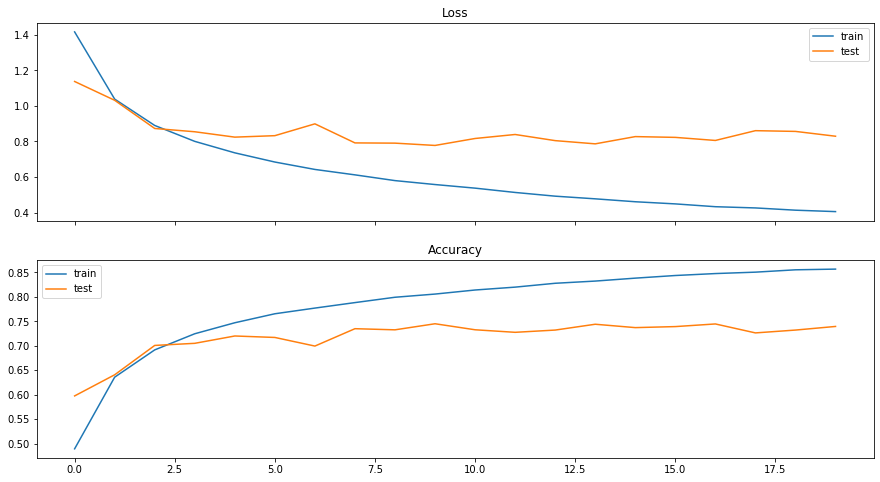

In [107]:
plot_loss_acc(train_loss, train_acc, test_loss, test_acc)

In [95]:
def get_CNN(sizes):
    layers = []
    current_size = 3
    for size in sizes:
        layers.append(nn.Conv2d(current_size, size, 3))
        layers.append(nn.ReLU())
        layers.append(nn.MaxPool2d(2))
        current_size = size
    layers.append(nn.Flatten())
    mn = nn.Sequential(*layers)
    output_size = get_output_shape(mn, (1, 3, 32, 32))[1]
    print(output_size)
    layers.append(nn.Linear(output_size, 10))
    return nn.Sequential(*layers)

In [96]:
n = get_CNN([16, 32, 64])

256


In [89]:
def get_output_shape(model, image_dim):
    return model(torch.rand(*(image_dim))).data.shape

In [145]:
class ResBlock(nn.Module):
    def __init__(self, n_outputs, n_inputs=None):
        super().__init__()
        start_size = n_inputs if n_inputs else n_outputs
        self.seq = nn.Sequential(nn.Conv2d(start_size, n_outputs, kernel_size=3, padding=1, stride=1), nn.BatchNorm2d(n_outputs), nn.ReLU(), nn.Conv2d(n_outputs, n_outputs, kernel_size=3, padding=1, stride=1),  nn.BatchNorm2d(n_outputs))
        if n_inputs:
            self.extra_conv = nn.Conv2d(n_inputs, n_outputs, kernel_size=1, padding=0, stride=1)
        else:
            self.extra_conv = None
        self.last_relu = nn.ReLU()
        
    def forward(self, x):
        main_x = self.seq(x)
        print(main_x.shape)
        if self.extra_conv:
            x = self.extra_conv(x)
            print(x.shape)
        return self.last_relu(main_x + x)

In [146]:
def get_resCNN(sizes):
    input_size = 3
    layers = []
    for i, size in enumerate(sizes):
        if i:
            layers.append(ResBlock(size))
        else:
            print("ja ja ja")
            layers.append(ResBlock(size, input_size))
    layers.append(nn.Flatten())
    output_size = get_output_shape(nn.Sequential(*layers), (1, 3, 32, 32))[1]
    layers.append(nn.Linear(output_size, 10))
    return nn.Sequential(*layers)

In [147]:
get_resCNN([16, 32])

ja ja ja
torch.Size([1, 16, 32, 32])
torch.Size([1, 16, 32, 32])


RuntimeError: Given groups=1, weight of size 32 32 3 3, expected input[1, 16, 32, 32] to have 32 channels, but got 16 channels instead